In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import decimal as dec
import matplotlib.pyplot as plt

In [2]:
run = False
if run:
    sp500=pd.read_excel("SP500-CapWeight-Ref.xlsx")
    symbols = sp500["Symbol"]

    market_cap = dict()

    for symbol in symbols:
        data = yf.Ticker(symbol)
        try:
            mrk_cap = data.info['marketCap']
            market_cap[symbol] = mrk_cap
        except:
            market_cap[symbol] = "N/A"
            
    market_cap = pd.DataFrame.from_dict(market_cap, orient='index')
    market_cap.to_csv("checkvals.csv")

else:
    market_cap = pd.read_csv("checkvals.csv", index_col="Symbol")

In [3]:
dec_market_cap = market_cap.apply(lambda x: dec.Decimal(float(x.values)), axis=1 )

C:\Users\ljohny\AppData\Local\Temp\ipykernel_29488\1066736949.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dec_market_cap = market_cap.apply(lambda x: dec.Decimal(float(x.values)), axis=1 )


In [4]:
total_market_cap = np.sum( dec_market_cap )
print(total_market_cap)

45390414141440


In [5]:
cap_weights = dec_market_cap.apply(lambda x: x/total_market_cap)

In [6]:
cap_weights.to_csv("cap_weights.csv")

In [7]:
cap_weights.sort_values(ascending=False, inplace=True)

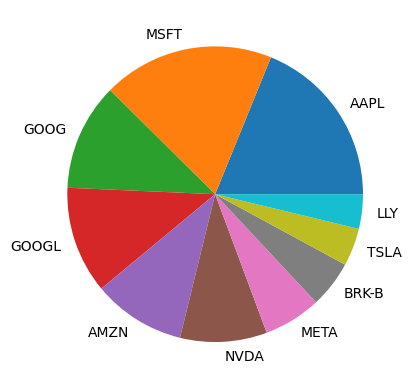

In [8]:
# print(cap_weights[0:10])

top_10 = cap_weights[0:10].to_frame()
top_10.rename({0:'Weight'},  axis=1, inplace=True )

fig, ax = plt.subplots()
ax.pie(top_10['Weight'], labels=top_10.index.values);

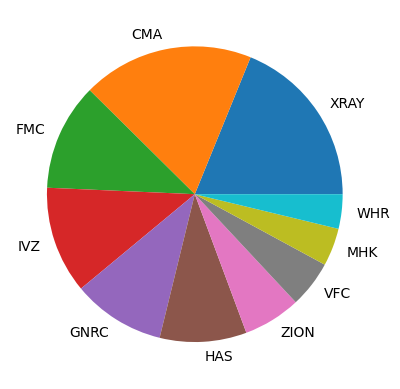

In [42]:
bottom_10 = cap_weights[-10:].to_frame()
bottom_10.rename({0:'Weight'},  axis=1, inplace=True )

fig, ax = plt.subplots()
ax.pie(top_10['Weight'], labels=bottom_10.index.values);